In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import wave

%matplotlib inline

In [16]:
# import database
records = wave.getRecords('All')

raw_data = []
data_length = []
for i in range(0, len(records[0])):
    data = wave.load(records[0][i])
    data_length.append(len(data))
    raw_data.append(data)

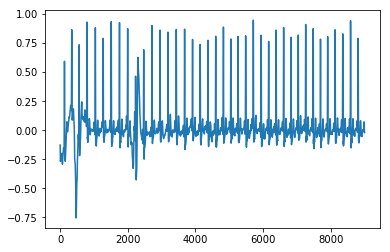

In [17]:
plt.plot(raw_data[0])

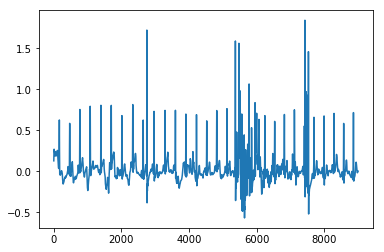

In [18]:
plt.plot(raw_data[1])

In [19]:
max_length = 16384

In [20]:
# making the signals the same length for tensorflow
def make_same_length(data, max_length):
    dlength = len(data.tolist())
    if dlength < max_length:
        new_data = []
        while max_length > len(new_data):
            new_data.extend(data)
        new_data = new_data[0:max_length]
        
        return new_data
    else:
        return data[:max_length]

In [21]:
new_data = make_same_length(raw_data[0], max_length)

In [22]:
print(len(new_data))
print(new_data)

16384
[-0.127, -0.16200000000000001, -0.19700000000000001, -0.22900000000000001, -0.245, -0.254, -0.26100000000000001, -0.26500000000000001, -0.26800000000000002, -0.26800000000000002, -0.26700000000000002, -0.26500000000000001, -0.26300000000000001, -0.26000000000000001, -0.25600000000000001, -0.253, -0.249, -0.247, -0.245, -0.24299999999999999, -0.24099999999999999, -0.23799999999999999, -0.23599999999999999, -0.23400000000000001, -0.23200000000000001, -0.23100000000000001, -0.23000000000000001, -0.22900000000000001, -0.22900000000000001, -0.22900000000000001, -0.22900000000000001, -0.23000000000000001, -0.23000000000000001, -0.23000000000000001, -0.22900000000000001, -0.22900000000000001, -0.22700000000000001, -0.22500000000000001, -0.221, -0.218, -0.215, -0.21299999999999999, -0.21299999999999999, -0.21299999999999999, -0.21199999999999999, -0.21099999999999999, -0.20999999999999999, -0.20899999999999999, -0.20599999999999999, -0.20300000000000001, -0.20100000000000001, -0.19800000

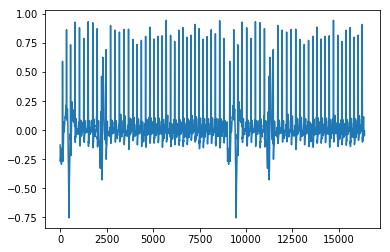

In [23]:
plt.plot(new_data)

In [24]:
# make data the same length
sl_data = []
for i in range(0, len(raw_data)):
    data = make_same_length(raw_data[i], max_length)
    sl_data.append(data)


In [25]:
len(sl_data[10])

16384

In [26]:
#numerical labels: A = 1, N = 2, O = 3, ~ = 4

labels = records[1]
num_labels = []
for i in range(0,len(labels)):
    if labels[i] == "A":
        num_labels.append(1)
    elif labels[i] == "N":
        num_labels.append(2)
    elif labels[i] == "O":
        num_labels.append(3)
    elif labels[i] == "~":
        num_labels.append(4)
        


In [27]:
len(num_labels)
print (num_labels)

[2, 2, 2, 1, 1, 2, 2, 3, 1, 2, 2, 2, 3, 2, 1, 2, 3, 2, 2, 3, 2, 4, 3, 3, 2, 2, 1, 2, 3, 3, 2, 2, 2, 4, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 3, 4, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 1, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 1, 3, 2, 1, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 1, 1, 3, 2, 2, 4, 1, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 4, 3, 2, 1, 2, 2, 3, 1, 3, 2, 2, 3, 1, 3, 4, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 3, 3, 2, 3, 3, 2, 4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 4, 2, 3, 2, 2, 4, 2, 3, 3, 4, 2, 2, 1, 3, 2, 3, 3, 3, 2, 3, 1, 1, 3, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 1, 2, 2, 2, 3, 3, 1, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 1, 2, 2, 1, 3, 2, 3, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 1, 2, 2, 2, 2, 2, 4, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 

In [28]:
# The train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sl_data, num_labels, test_size=0.3, random_state=42)

In [18]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

5969
2559
5969
2559


In [37]:
from tensorflow.contrib.layers import flatten
EPOCHS = 50
BATCH_SIZE = 128

def conv(layer_input, w_dim, b_dim, conv_strides=1, conv_padding='SAME', \
         pool_ksize=2, pool_strides=2, pool_padding='SAME', mu=0, sigma=0.1):
    cw = tf.Variable(tf.truncated_normal(shape=w_dim, mean=mu, stddev=sigma))
    cb = tf.Variable(tf.zeros(b_dim))
    conv_layer = tf.nn.conv2d(layer_input, cw, strides=[1,conv_strides,conv_strides,1], padding=conv_padding)
    conv_layer = tf.nn.bias_add(conv_layer, cb)
    conv_layer = tf.nn.relu(conv_layer)
    conv_layer = tf.nn.max_pool(conv_layer, ksize=[1,pool_ksize,1,1], \
                                strides=[1,pool_strides,1,1], padding=pool_padding)
    return conv_layer

def full_connect(layer_input, w_dim, b_dim, mu = 0, sigma = 0.1, relu=True):
    w = tf.Variable(tf.truncated_normal(shape=w_dim, mean=mu, stddev=sigma))
    b = tf.Variable(tf.zeros(b_dim))
    if relu:
        return tf.nn.relu(tf.add(tf.matmul(layer_input, w), b))
    else:
        return tf.add(tf.matmul(layer_input, w), b)
    
def cnn_model(x, dropout):
    
    #convolutional layer 1, x1x1 => convolution: 16384x1x16 => max pooling: 2048x1x16
    conv_layer = conv(x, w_dim=[200,1,1,16], b_dim=[16], conv_strides=1, conv_padding='SAME',\
                     pool_ksize=2, pool_strides=8, pool_padding='SAME')
    
    #convolutional layer 2, 2048x1x16 => convolution: 2048x1x32 => max pooling: 256x1x32
    conv_layer = conv(conv_layer, w_dim=[50,1,16,32], b_dim=[32], conv_strides=1, conv_padding='SAME',\
                     pool_ksize=2, pool_strides=8, pool_padding='SAME')
    
    #convolutional layer 3, 256x1x32 => convolution: 256x1x64 => max pooling: 32x1x64
    conv_layer = conv(conv_layer, w_dim=[25,1,32,64], b_dim=[64], conv_strides=1, conv_padding='SAME',\
                     pool_ksize=2, pool_strides=8, pool_padding='SAME')

    
    
    #flatten
    fc_layer = flatten(conv_layer)
    #fully connected layer 2, 2048 => 400
    fc_layer = full_connect(fc_layer, w_dim=[2048,400], b_dim=[400])
    fc_layer = tf.nn.dropout(fc_layer, dropout)
    #Fully connected layer 3, 400 => 120
    fc_layer = full_connect(fc_layer, w_dim=[400,120], b_dim=[120])
    fc_layer = tf.nn.dropout(fc_layer, dropout)
    #fully connected layer 4, 120 => 84
    fc_layer = full_connect(fc_layer, w_dim=[120,84], b_dim=[84])
    fc_layer = tf.nn.dropout(fc_layer, dropout)
    #fully connected layer 5, 84 => 4
    logics = full_connect(fc_layer, w_dim=[84, 4], b_dim=[4], relu=False)
    
    return logics

In [44]:
keep_prob = tf.placeholder(tf.float32)
X = tf.placeholder(tf.float32, [None, 16384])
X_resized = tf.reshape(X, [tf.shape(X)[0], max_length, 1, 1])
y = tf.placeholder(tf.int32, [None])
one_hot_y = tf.one_hot(y, 4)

In [45]:
### Train your model here.
rate = 0.001

logits = cnn_model(X_resized, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#accuracy and loss
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(one_hot_y,1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_X, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={X: batch_X, y: batch_y, keep_prob: 0.75})
        total_accuracy += (accuracy * len(batch_X))
    return total_accuracy / num_examples

In [46]:
### Calculate and report the accuracy on the training and validation set.
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print ('Training...')
    print ()
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_X, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={X: batch_X, y: batch_y, keep_prob: 0.75})
        
        validation_accuracy = evaluate(X_test, y_test)
        print ('EPOCHS {}..'.format(i+1))
        print ('validation_accuracy = {:.3f}'.format(validation_accuracy))
        print ()
        
    saver.save(sess, 'first_model')
    print ('model_saved')

Training...

EPOCHS 1..
validation_accuracy = 0.585

EPOCHS 2..
validation_accuracy = 0.529

EPOCHS 3..
validation_accuracy = 0.288

EPOCHS 4..
validation_accuracy = 0.588



KeyboardInterrupt: 

In [ ]:
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
#with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))

    #test_accuracy = evaluate(X_test, y_test)
    #print("Test Accuracy = {:.3f}".format(test_accuracy))